# <center> Винные обзоры

+ country - страна-производитель вина
+ description - подробное описание
+ designation - название виноградника, где выращивают виноград для вина
+ points - количество баллов, которое WineEnthusiast оценил вино по шкале от 1 до 100
+ price - стоимость бутылки вина
+ province - провинция или штат 
+ region_1 - винодельческий район в провинции или штате (например, Напа)
+ region_2 - конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например, Резерфорд в долине Напа), но это значение иногда может быть пустым.
+ taster_name - имя дегустатора
+ taster_twitter_handle - твиттер дегустатора
+ title - название вина, который часто содержит годи др подробную информацию
+ variety -  сорт винограда, из которого изготовлено вино (например, Пино Нуар).
+ winery - винодельня, которая производила вино

In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv('data/wine.csv')

In [64]:
# узнаем сколько всего дегустаторов приняло участие в винных обзорах
data['taster_name'].nunique()

19

In [65]:
# максимальная цена за бутылку
data['price'].max()

3300.0

In [66]:
# избавляемся от дубликатов
mask = data.duplicated(subset=data.columns)
data_duplicates = data[mask] # фильтруем наш датасет
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')
data = data.drop_duplicates()

Число найденных дубликатов: 9983


## <center> Очистка данных

In [67]:
# Определяем список столбцов с пропусками

# процент пропусков в каждом столбце
cols_null_percent = data.isnull().mean() * 100
# столбцы с пропусками
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
cols_with_null

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

### <center> Визуализируем пропуски

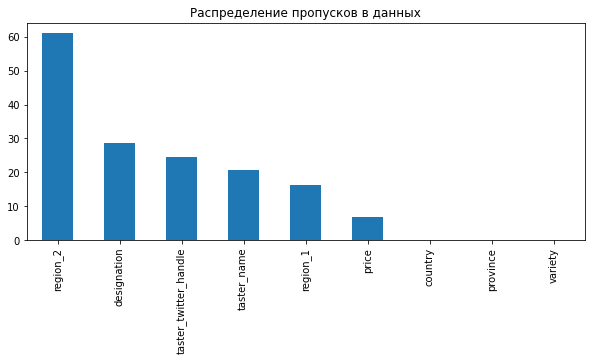

In [68]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

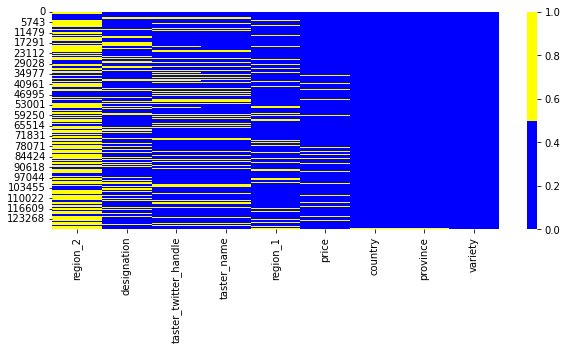

In [69]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

### <center> Удаляем пропуски

In [70]:
# удаляем столбцы, в которых менее 70% заполнены

# создаем копию исходной таблицы
drop_data = data.copy()
# задаем минимальный порог: 70% от числа строк
thresh = drop_data.shape[0] * 0.7
# удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)

### <center> Заполнение недостающих значений константами

In [71]:
# признаки, в которых пропуски
cols_with_null

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

In [72]:
# создаём копию таблицы
fill_data = drop_data.copy()
# создаем словарь - имя столбца:на что заменяем
values = {
    # категориальные признаки заменяем на 'unknown'
    'designation': 'unknown',
    'taster_twitter_handle': 'unknown',
    'taster_name': 'unknown',
    'region_1': 'unknown',
    
    # признаки с маленьким количеством пропусков заменим на часто встречающиеся
    'price': fill_data['price'].mean(),
    'country': fill_data['country'].mode()[0],
    'province': fill_data['province'].mode()[0],
    'variety': fill_data['variety'].mode()[0]
}
# заполняем пропуски в соответсвии со словарем
fill_data = fill_data.fillna(values)
# выводим результирующую долю пропусков
fill_data.isnull().mean()

country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

<AxesSubplot:>

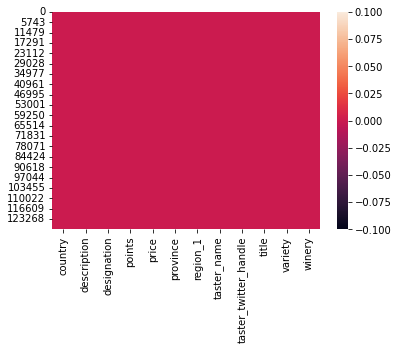

In [74]:
sns.heatmap(fill_data.isnull()) # убеждаемся, что датасет без пропусков

In [75]:
data = fill_data.to_csv('data/wine_cleared.csv', index=False) # сохраняем очищенный датасет для дальнейшей работы